### Prophet exercise

In [91]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid', palette='inferno')

# import prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [92]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [93]:
wmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


In [94]:
wmt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,11815.000000,11815.000000,11815.000000,11815.000000,11815.000000,1.181500e+04
mean,29.942336,30.226543,29.658511,29.948090,24.052813,7.510762e+06
std,29.802418,30.051176,29.566506,29.811830,26.403796,6.327371e+06
min,0.015625,0.015625,0.014404,0.015625,0.005798,0.000000e+00
25%,1.265625,1.281250,1.253906,1.265625,0.513472,3.753600e+06
50%,13.718750,13.843750,13.562500,13.687500,8.964169,6.263200e+06
75%,54.000000,54.570000,53.500000,54.000000,40.389094,9.515000e+06
max,111.489998,112.220001,111.029999,111.599998,111.599998,1.318336e+08


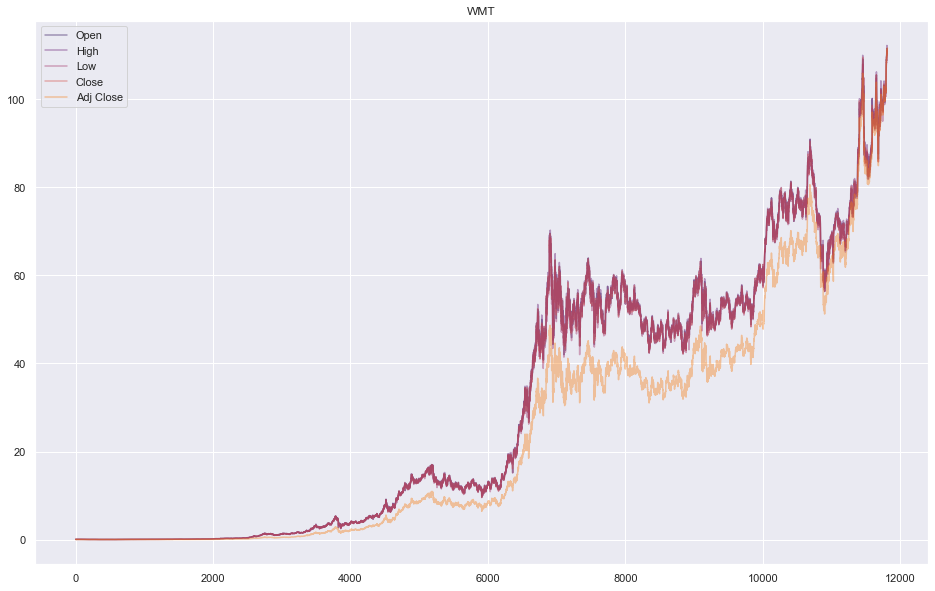

In [95]:
fig,ax = plt.subplots(figsize=(16,10))
ax.set_title('WMT')
wmt[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(ax=ax, alpha=0.4)
plt.show()

* use only the `Date` and `Adj Close` columns

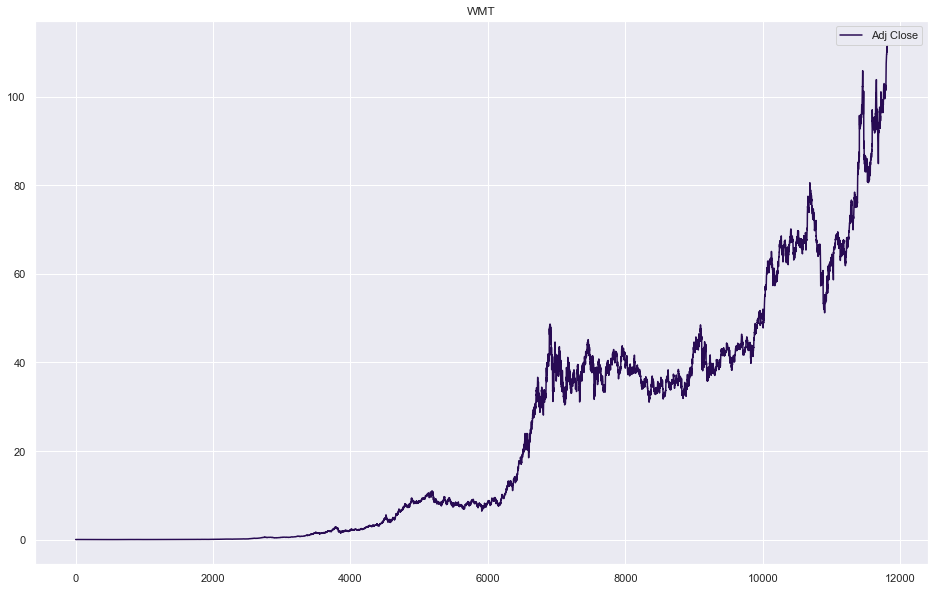

In [96]:
fig,ax = plt.subplots(figsize=(16,10))
ax.set_title('WMT')
wmt[['Adj Close']].plot(ax=ax)
plt.show()

* rename columns to fit the Prophet naming convention

In [97]:
wmt.drop(columns=[
    'Adj Close',
    'Volume'
], inplace=True)

wmt.rename(columns={
    'Date' : 'ds',
    'Open' : 'yopen',
    'High' : 'yhat_upper',
    'Low' : 'yhat_lower',
    'Close' : 'y',
}, inplace=True)

In [98]:
wmt

,ds,yopen,yhat_upper,yhat_lower,y
0,1972-08-25,0.063477,0.064697,0.063477,0.064453
1,1972-08-28,0.064453,0.064941,0.064209,0.064209
2,1972-08-29,0.063965,0.063965,0.063477,0.063477
3,1972-08-30,0.063477,0.063477,0.062988,0.063477
4,1972-08-31,0.062988,0.062988,0.062500,0.062500
...,...,...,...,...,...
11810,2019-06-26,110.849998,111.080002,110.099998,110.160004
11811,2019-06-27,110.059998,110.510002,108.860001,110.099998
11812,2019-06-28,110.550003,111.510002,110.239998,110.489998
11813,2019-07-01,111.300003,111.970001,110.019997,110.620003


* convert date to datetime

In [99]:
wmt['ds'] = pd.to_datetime(wmt['ds'])

* plot time-series

<AxesSubplot:>

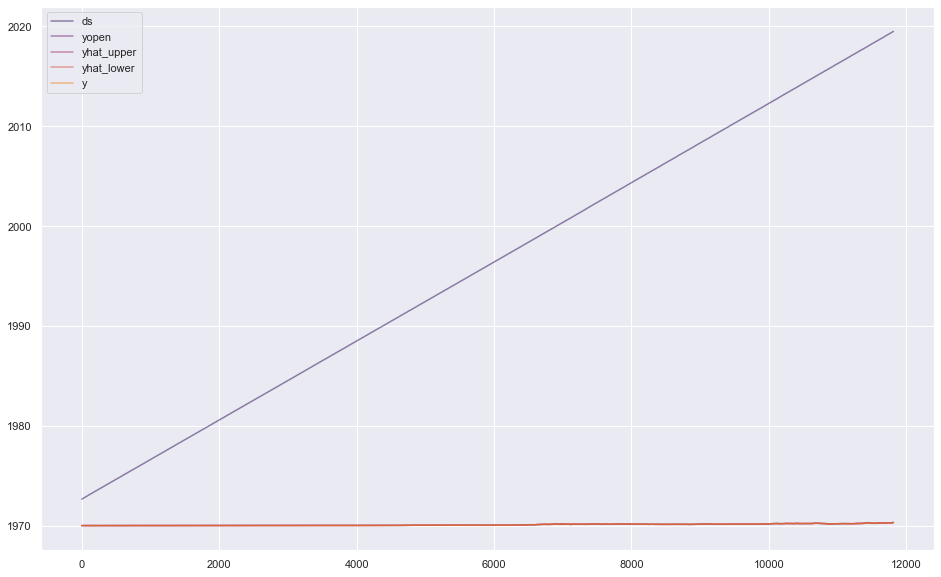

In [100]:
fig,ax = plt.subplots(figsize=(16,10))
wmt.plot(ax=ax, alpha=0.5)

* instantiate Prophet

In [101]:
m = Prophet()

* fit model

In [102]:
m.fit(wmt)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -380.235
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       29924.6    0.00613354        5489.7      0.7872      0.7872      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       30921.2     0.0329291       13668.4      0.4046           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       31325.3    0.00243907       2053.85      0.2807           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       31656.8     0.0079161       2520.54           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       31970.9     0.0821826       8286.32           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

* forecast 365 values into the future 

In [103]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1972-08-25,-0.504053,-6.225748,4.990565
1,1972-08-28,-0.490542,-5.716260,5.254092
2,1972-08-29,-0.473614,-5.151987,4.583773
3,1972-08-30,-0.493957,-5.846923,4.797511
4,1972-08-31,-0.499191,-5.848947,4.721138
...,...,...,...,...
12175,2020-06-27,97.015181,91.392664,102.486766
12176,2020-06-28,97.019342,91.659893,102.571366
12177,2020-06-29,96.989857,91.524852,102.655837
12178,2020-06-30,97.014471,91.661326,102.435744


* plot forecast

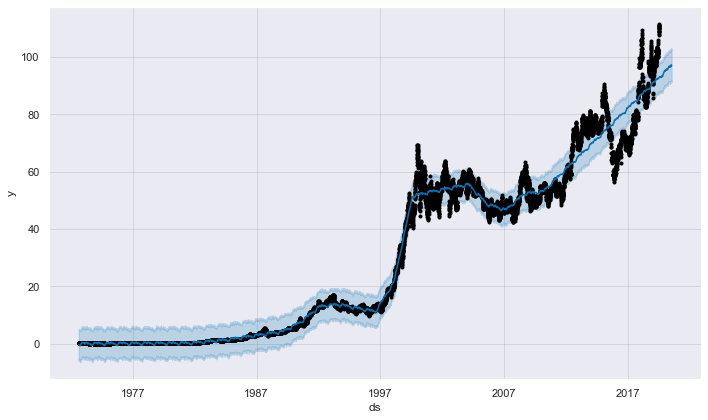

In [104]:
fig1 = m.plot(forecast)

* plot components

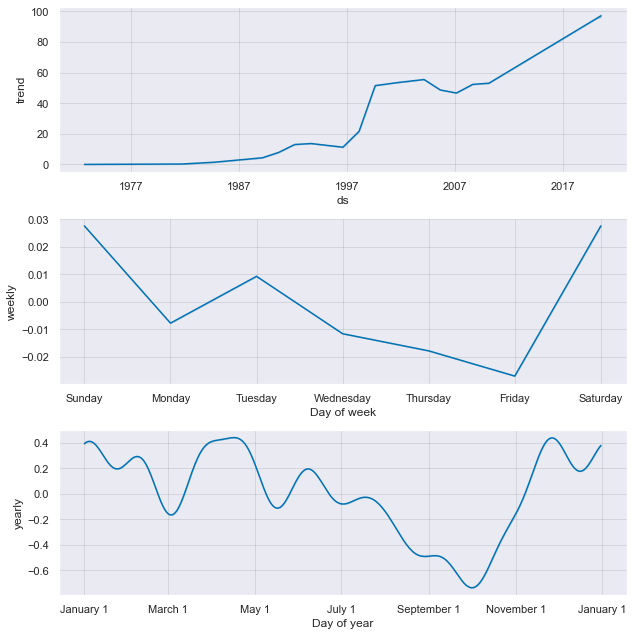

In [105]:
fig2 = m.plot_components(forecast)

## Stretch
### Arima vs. Prophet Modeling

- Build the separate ARIMA model and compare with existing Prophet prediction. Use the last 7 values we have in the timeseries to test which approach has better predictions.